Opening the Data Sources

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
import zipfile
import sqlite3

In [2]:
movie_gross_data = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
print(movie_gross_data)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [3]:
with zipfile.ZipFile("zippedData/im.db.zip", "r") as zObject:
        zObject.extractall()

In [4]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [5]:
pd.read_sql("""
SELECT *
FROM persons
;
""", conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [39]:
pd.read_sql("""
SELECT genres
FROM movie_basics
GROUP BY genres
;
""", conn)

,genres
0,None
1,Action
2,"Action,Adult,Comedy"
3,"Action,Adventure"
4,"Action,Adventure,Animation"
...,...
1081,"Thriller,War,Western"
1082,"Thriller,Western"
1083,War
1084,"War,Western"


In [7]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;
""", conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [101]:
q = """
SELECT averagerating as avg_rating, genres
FROM movie_ratings
JOIN movie_basics
    USING (movie_id)
WHERE averagerating IS NOT NULL
AND genres IS NOT NULL
ORDER BY avg_rating desc
limit 200
;
"""
high_ratings = pd.read_sql(q, conn)
print(high_ratings)

    avg_rating             genres
0         10.0        Documentary
1         10.0        Documentary
2         10.0  Crime,Documentary
3         10.0        Documentary
4         10.0        Documentary
..         ...                ...
95         9.4        Documentary
96         9.4        Documentary
97         9.4        Documentary
98         9.4              Drama
99         9.4        Documentary

[100 rows x 2 columns]


In [102]:
high_ratings_analysis = high_ratings.groupby(by="genres")["avg_rating"].mean()

print(high_ratings_analysis) 

genres
Action                              9.700000
Adventure,Biography,Documentary     9.600000
Adventure,Comedy                   10.000000
Adventure,Documentary               9.600000
Animation,Documentary,Family        9.600000
Biography                           9.500000
Biography,Comedy,Documentary        9.500000
Biography,Documentary,Drama         9.766667
Biography,Documentary,Music         9.800000
Biography,Drama,History             9.600000
Comedy                              9.600000
Comedy,Documentary                  9.800000
Comedy,Documentary,Sport            9.700000
Comedy,Drama                        9.850000
Comedy,Drama,Family                 9.550000
Comedy,Drama,Musical                9.500000
Crime,Documentary                  10.000000
Documentary                         9.691379
Documentary,Drama,History           9.500000
Documentary,Drama,Music             9.600000
Documentary,Drama,Sport             9.600000
Documentary,Family,Romance          9.700000
Doc

In [112]:
top_30 = high_ratings_analysis.iloc[:30]

print(top_30)

genres
Action                              9.700000
Adventure,Biography,Documentary     9.600000
Adventure,Comedy                   10.000000
Adventure,Documentary               9.600000
Animation,Documentary,Family        9.600000
Biography                           9.500000
Biography,Comedy,Documentary        9.500000
Biography,Documentary,Drama         9.766667
Biography,Documentary,Music         9.800000
Biography,Drama,History             9.600000
Comedy                              9.600000
Comedy,Documentary                  9.800000
Comedy,Documentary,Sport            9.700000
Comedy,Drama                        9.850000
Comedy,Drama,Family                 9.550000
Comedy,Drama,Musical                9.500000
Crime,Documentary                  10.000000
Documentary                         9.691379
Documentary,Drama,History           9.500000
Documentary,Drama,Music             9.600000
Documentary,Drama,Sport             9.600000
Documentary,Family,Romance          9.700000
Doc

In [111]:
plt.figure(figsize=(10, 5))
plt.bar(top_30["genres"], top_30["avg_rating"], color = "r")
plt.xlabel("Genres")
plt.xticks(rotation = 90)
plt.ylabel("Average Rating")
plt.title("Genres with the Highest Ratings")
plt.legend(labels=['Average Rating'])
plt.show()

KeyError: 'avg_rating'

<Figure size 720x360 with 0 Axes>

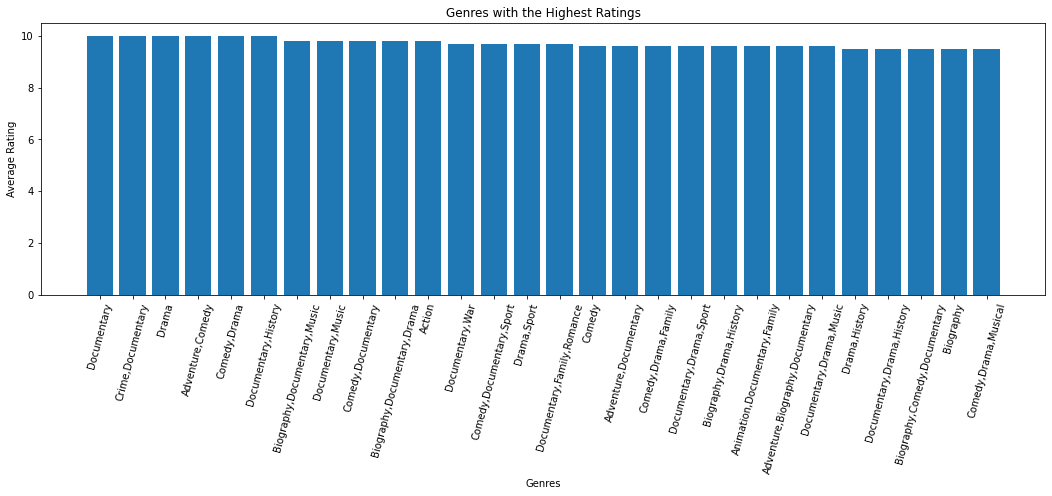

In [114]:
sql = """SELECT averagerating as avg_rating, genres
FROM movie_ratings
JOIN movie_basics
    USING (movie_id)
ORDER BY averagerating desc
LIMIT 100"""

f, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=75)

data = pd.read_sql(sql, conn)
plt.bar(high_ratings, data.avg_rating)
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.title("Genres with the Highest Ratings")
plt.show()

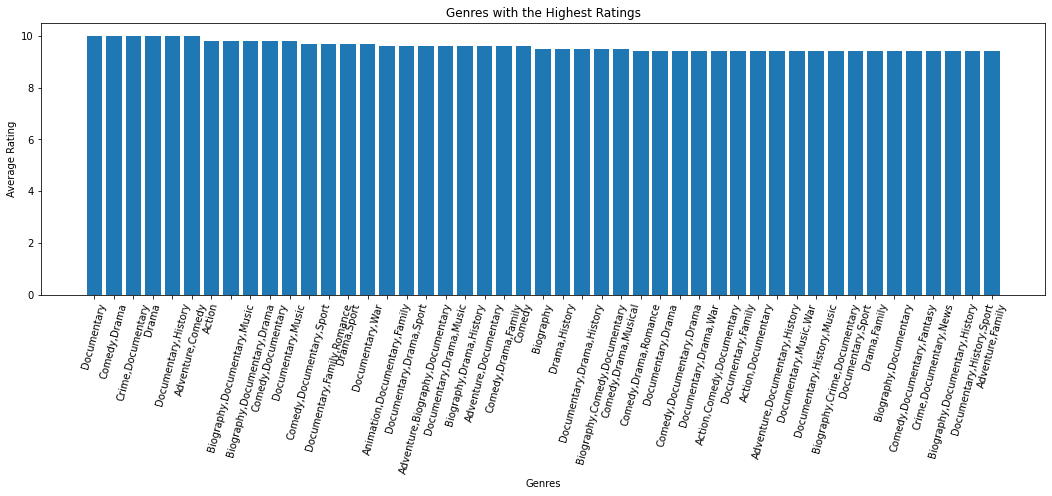

In [113]:
q = """
SELECT averagerating as avg_rating, genres
FROM movie_ratings
JOIN movie_basics
    USING (movie_id)
WHERE averagerating IS NOT NULL
AND genres IS NOT NULL
ORDER BY avg_rating desc
limit 100
;
"""

f, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=75)

high_ratings = pd.read_sql(sql, conn)
plt.bar(high_ratings.genres, high_ratings.avg_rating)
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.title("Genres with the Highest Ratings")
plt.show()

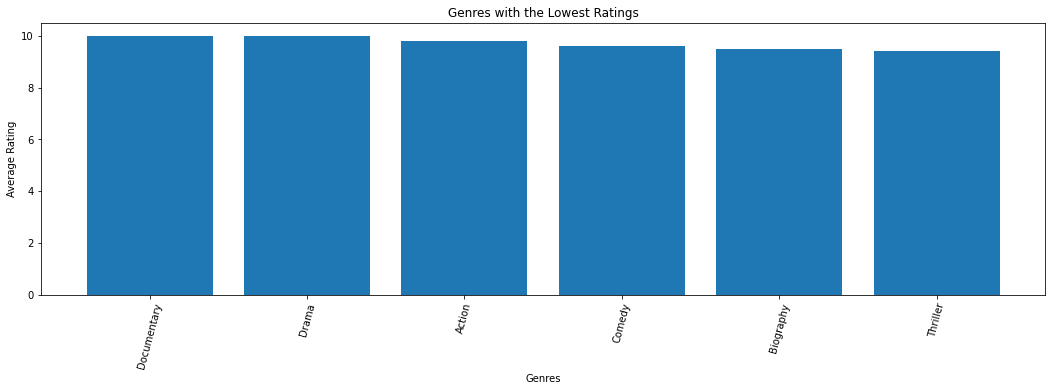

In [77]:
sql = """SELECT averagerating as avg_rating, genres
FROM movie_ratings
JOIN movie_basics
    USING (movie_id)
WHERE averagerating IS NOT NULL
AND genres IS NOT NULL
AND genres IN  ('Drama', 'Comedy', 'Action', 'Romance', 'Documentary', 'Crime', 'Thriller', 'War', 'Biography')
ORDER BY averagerating DESC
LIMIT 175"""

f, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=75)

data = pd.read_sql(sql, conn)

plt.bar(data.genres, data.avg_rating)
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.title("Genres with the Lowest Ratings")
plt.show()

In [32]:

movie_popularity = pd.read_csv("zippedData/tmdb.movies.csv.gz")
print(movie_popularity)


       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [10]:
#cleaning 
movie_gross_data = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross_data["foreign_gross"].fillna(0, inplace = True)
movie_gross_data["domestic_gross"].fillna(0, inplace = True)
movie_gross_data.dropna(inplace = True)
print(movie_gross_data)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [12]:
#cleaning 
movie_gross_data["domestic_gross"].replace(',','', regex = True, inplace = True)
movie_gross_data["foreign_gross"].replace(',','', regex = True, inplace = True)


In [13]:
movie_gross_data["total_gross"] = movie_gross_data["foreign_gross"].astype(float) + movie_gross_data["domestic_gross"].astype(float)
print(movie_gross_data)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year   